| epoch 1 |  iter 1 / 19 | time 0[s] | perplexity 418.06
| epoch 2 |  iter 1 / 19 | time 0[s] | perplexity 359.45
| epoch 3 |  iter 1 / 19 | time 0[s] | perplexity 257.29
| epoch 4 |  iter 1 / 19 | time 0[s] | perplexity 219.68
| epoch 5 |  iter 1 / 19 | time 0[s] | perplexity 209.70
| epoch 6 |  iter 1 / 19 | time 0[s] | perplexity 208.58
| epoch 7 |  iter 1 / 19 | time 0[s] | perplexity 199.59
| epoch 8 |  iter 1 / 19 | time 0[s] | perplexity 199.77
| epoch 9 |  iter 1 / 19 | time 0[s] | perplexity 194.80
| epoch 10 |  iter 1 / 19 | time 0[s] | perplexity 190.70
| epoch 11 |  iter 1 / 19 | time 0[s] | perplexity 192.46
| epoch 12 |  iter 1 / 19 | time 0[s] | perplexity 188.89
| epoch 13 |  iter 1 / 19 | time 0[s] | perplexity 192.22
| epoch 14 |  iter 1 / 19 | time 0[s] | perplexity 186.45
| epoch 15 |  iter 1 / 19 | time 0[s] | perplexity 186.40
| epoch 16 |  iter 1 / 19 | time 0[s] | perplexity 189.96
| epoch 17 |  iter 1 / 19 | time 0[s] | perplexity 188.99
| epoch 18 |  iter 1 / 

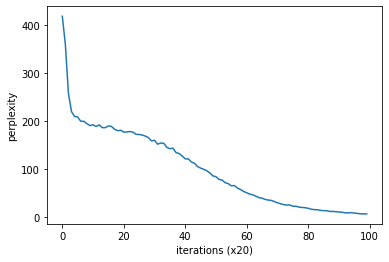

In [1]:
# coding: utf-8
import sys
sys.path.append('..')
from common.optimizer import SGD
from common.trainer import RnnlmTrainer
from dataset import ptb
from simple_rnnlm import SimpleRnnlm


# ハイパーパラメータの設定
batch_size = 10
wordvec_size = 100
hidden_size = 100  # RNNの隠れ状態ベクトルの要素数
time_size = 5  # RNNを展開するサイズ
lr = 0.1
max_epoch = 100

# 学習データの読み込み
corpus, word_to_id, id_to_word = ptb.load_data('train')
corpus_size = 1000  # テスト用にデータセットを小さくする
corpus = corpus[:corpus_size]
vocab_size = int(max(corpus) + 1)
xs = corpus[:-1]  # 入力
ts = corpus[1:]  # 出力（教師ラベル）

# モデルの生成
model = SimpleRnnlm(vocab_size, wordvec_size, hidden_size)
optimizer = SGD(lr)
trainer = RnnlmTrainer(model, optimizer)

trainer.fit(xs, ts, max_epoch, batch_size, time_size)
trainer.plot()
